In [1]:
import os
import omdb
import csv
import pandas as pd
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import plotly.plotly as py
from plotly.graph_objs import *

In [2]:
df = pd.read_pickle("/Users/kristenkozmary/Desktop/databasedump.pickle")

In [3]:
#process dataframe into network
allActors = []
biGraph = nx.Graph()
actorSet = 0
movieSet = 1
count = 0

for index, row in df.iterrows():
    movie = row['title_director']
    biGraph.add_nodes_from([movie], bipartite=movieSet)
    actors = row['actors']
    if isinstance(actors, str):
        actors = actors.split(', ')
        #print(actors)
        for actor in actors:
            if not any(actor == name for name in allActors): # if actor is not in allActors already:
                allActors.append(actor)
                biGraph.add_nodes_from([actor], bipartite=actorSet)
                biGraph.add_edge(movie, actor, weight=1)
            else:
                #currWeight = biGraph[movie][actor]['weight']
                #print(actor)
                biGraph.add_edge(movie, actor, weight=1)
    count = count + 1
    #if count > 200:
    #    break

In [4]:
movieNodes = set(n for n, d in biGraph.nodes(data=True) if d['bipartite']==movieSet)
actorNodes = set(n for n, d in biGraph.nodes(data=True) if d['bipartite']==actorSet)
print(len(movieNodes))
print(len(actorNodes))

15674
27352


In [5]:
dataf = pd.DataFrame()
for index, row in df.iterrows():
    movie = row['title']
    actors = row['actors']
    if isinstance(actors, str):
        actors = actors.split(', ')
        #print(actors)
        for actor in actors:
            dataf = dataf.append([[actor,movie]])

In [8]:
datafMovies = dataf[1]
datafActors = dataf[0]
testActors = []
count = 0
#just testing with 10
for i in newdfActors:
    testActors.append(i)
    count = count + 1
    if count > 10:
        break

In [10]:
C = bipartite.projected_graph(biGraph, testActors, multigraph=False)

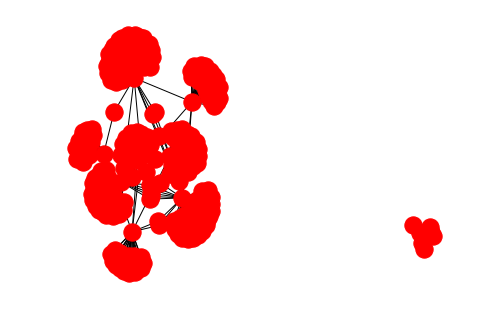

In [11]:
nx.draw(C)
plt.show()

In [15]:
C.number_of_nodes()

285

In [16]:
C.number_of_edges()

309